In [195]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import importlib
importlib.reload(site)
importlib.reload(honey)

<module 'honeycomb_plot' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/honeycomb_plot.py'>

In [196]:
Npx = 2 # Number of plaquette in each dimension
Npy = 4
model = site.SitesPBCxy(Npx, Npy)

In [197]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print("Nxsites ", model.Nxsites)
print("Nyrows ", model.Nyrows)
print(model.partition)
print(model.partition[0])

Number of sites: 16
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Nxsites  4
Nyrows  4
['A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A']
A


In [198]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]]


In [199]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(1, 1)


In [200]:
9 % 2

1

In [201]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
# diagonal_bond = model.get_diagonalbonds()
# anyon_bonds, px, py = model.get_anyonbonds()

In [202]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
# print("diagonal_bond: ", np.array(diagonal_bond))
# print("anyon_bonds: ", np.array(anyon_bonds))

xx_bond:  [[ 0  1]
 [ 2  3]
 [ 5  6]
 [ 7  4]
 [ 8  9]
 [10 11]
 [13 14]
 [15 12]]
yy_bond:  [[ 2  1]
 [ 0  3]
 [ 5  4]
 [ 7  6]
 [10  9]
 [ 8 11]
 [13 12]
 [15 14]]
zz_bond:  [[ 0  4]
 [ 2  6]
 [ 5  9]
 [ 7 11]
 [ 8 12]
 [10 14]
 [13  1]
 [15  3]]


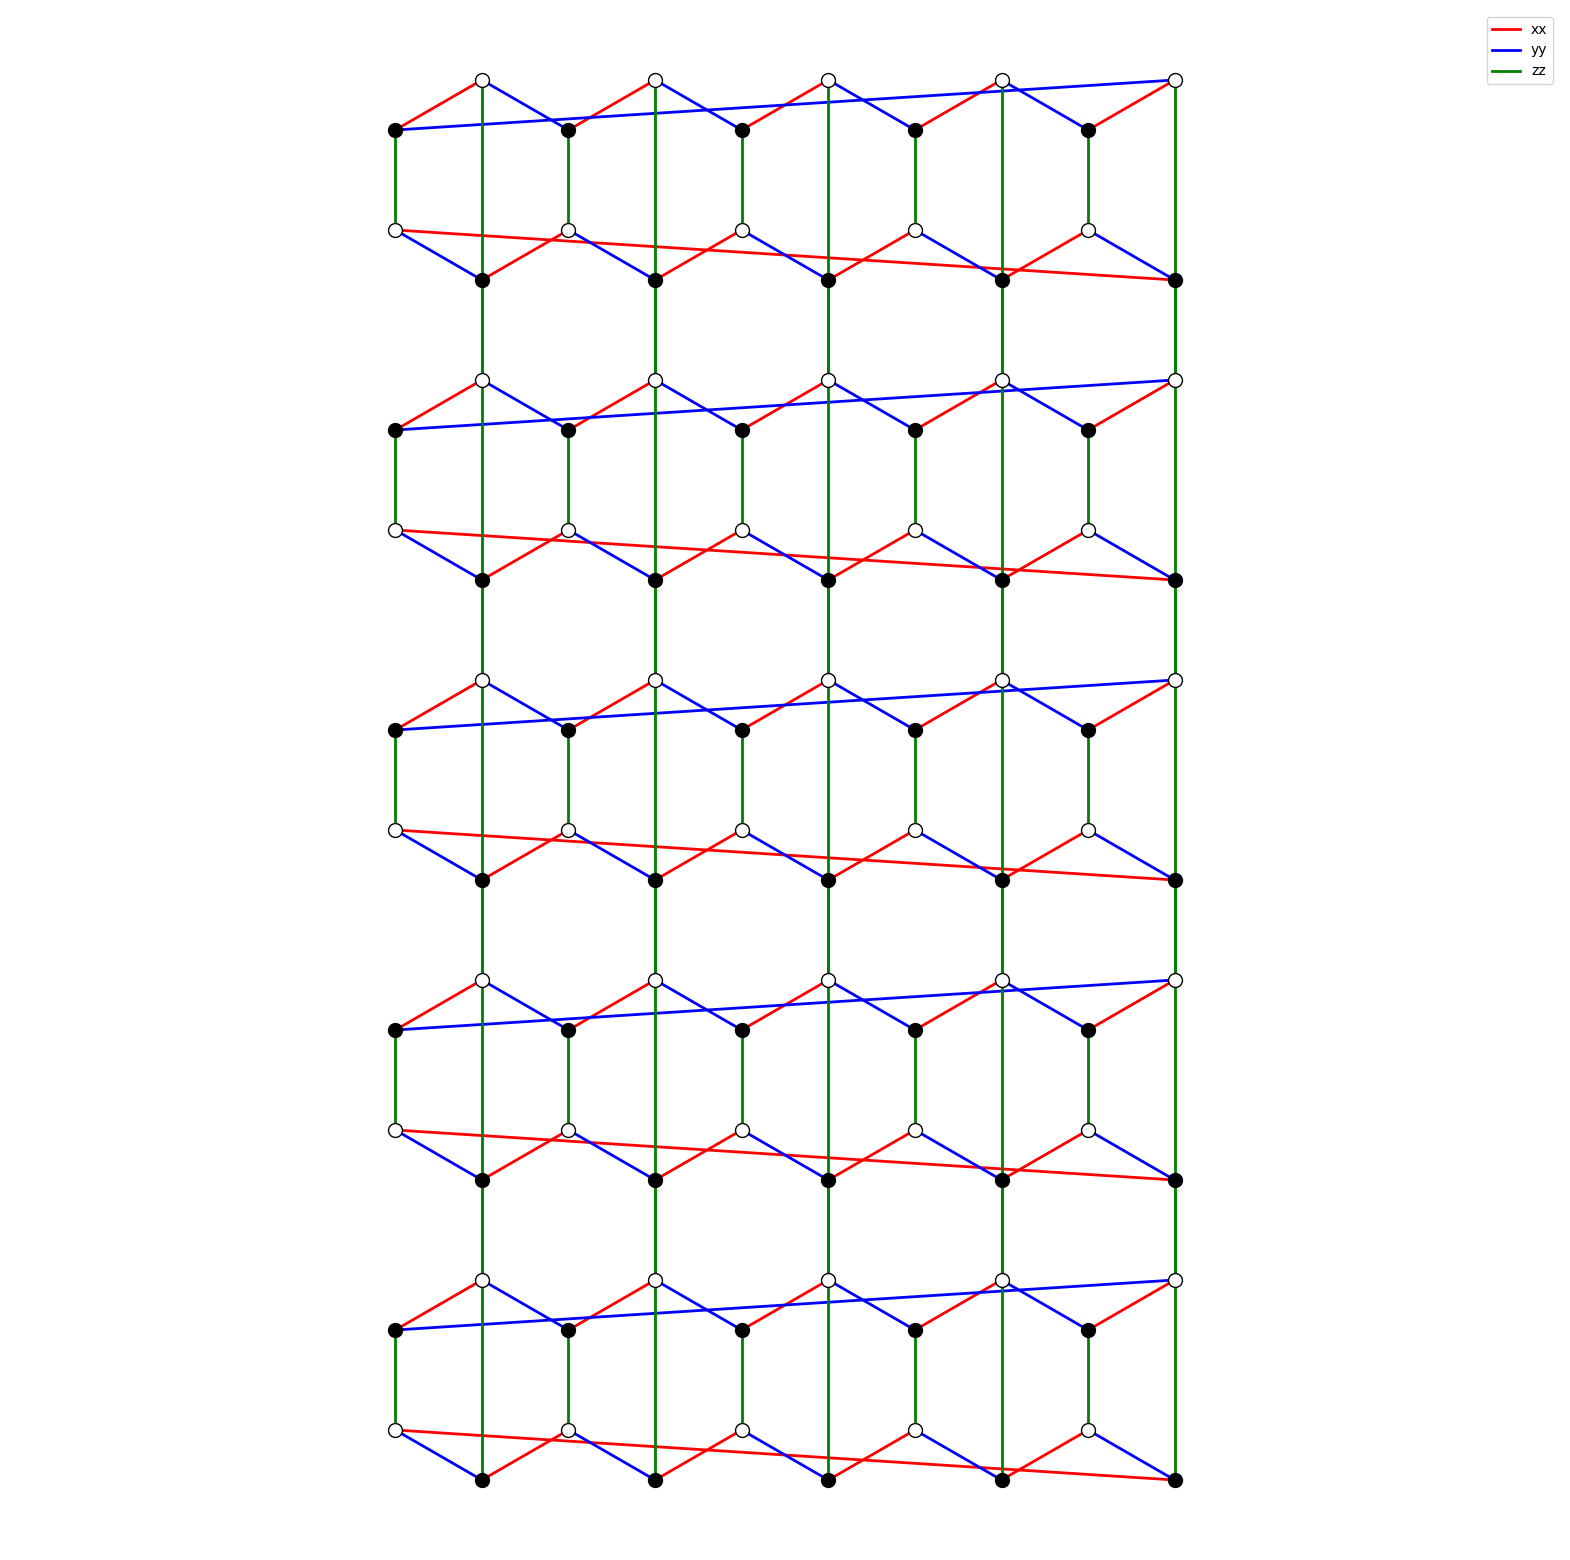

In [203]:
modell = site.SitesPBCxy(Npx = 5, Npy = 10)
honey.plot_honeycomb(modell, plot_anyon_bonds= False, plot_diagonal_bonds = False, 
                     #sites = indices, plaquette_site = 35
                     )

In [204]:
print(modell.id_to_idxidy(35))
print(modell.idxidy_to_id(5,4))

(5, 3)
45


### Fermionic representation of many wonderful things

In [205]:
import free_fermion_representation as f
importlib.reload(f)
import pandas as pd

In [206]:
model = site.SitesPBCxy(Npx=40, Npy=32)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

2560


In [207]:
h0_x = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0)*(1/1j)
h0_y = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0)*(1/1j)
h0_z = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0)*(1/1j)

H0_x = fgs.Hamiltonian_dirac(h0_x)
H0_y = fgs.Hamiltonian_dirac(h0_y)
H0_z = fgs.Hamiltonian_dirac(h0_z)

dfx = pd.DataFrame(H0_x)
dfy = pd.DataFrame(H0_y)
dfz = pd.DataFrame(H0_z)

print("Hamiltonian H0_x:\n", dfx.round(2))
print("Hamiltonian H0_y:\n", dfy.round(2))
print("Hamiltonian H0_z:\n", dfz.round(2))

Adding xx bonds with Jxx = 1.0
Adding yy bonds with Jyy = 1.0
Adding zz bonds with Jzz = 1.0
Hamiltonian H0_x:
           0         1         2         3         4         5         6     \
0    -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1     0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2     0.0+0.0j  0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3     0.0+0.0j  0.0+0.0j  0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4     0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j -1.0+0.0j  0.0+0.0j  0.0+0.0j   
...        ...       ...       ...       ...       ...       ...       ...   
2555  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2556  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2557  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2558  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2559  0.0+0.0j  0.0+0.0j  0.0+

In [208]:
he_x = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0, type='Anyon')*(1/1j)
he_y = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0, type='Anyon')*(1/1j)
he_z = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0, type='Anyon')*(1/1j)

He_x = fgs.Hamiltonian_dirac(he_x)
He_y = fgs.Hamiltonian_dirac(he_y)
He_z = fgs.Hamiltonian_dirac(he_z)

# dfex = pd.DataFrame(He_x)
# dfey = pd.DataFrame(He_y)
# dfez = pd.DataFrame(He_z)

# print("Hamiltonian He_x:\n", dfex.round(2))
# print("Hamiltonian He_y:\n", dfey.round(2))
# print("Hamiltonian He_z:\n", dfez.round(2))

Adding xx bonds with Jxx = 1.0
type = Anyon!
Adding yy bonds with Jyy = 1.0
type = Anyon!
Adding zz bonds with Jzz = 1.0
type = Anyon!


In [209]:
#check if elements He[20,21] He[21,22] He[22,23] and transpose are with of opposite sign
#with respect to H0
for i in [20,21,22]:
    print(i)
    print(h0_x[i,i+1], he_x[i,i+1])
    print(h0_x[i+1,i], he_x[i+1,i])
    print()
    print(h0_y[i,i+1], he_y[i,i+1])
    print(h0_y[i+1,i], he_y[i+1,i])
    print()
    print(h0_z[i,i+1], he_z[i,i+1])
    print(h0_z[i+1,i], he_z[i+1,i])
    print()

#WORKS

20
(0.5+0j) (0.5+0j)
(-0.5-0j) (-0.5-0j)

0j 0j
0j 0j

0j 0j
0j 0j

21
0j 0j
0j 0j

(-0.5-0j) (-0.5-0j)
(0.5+0j) (0.5+0j)

0j 0j
0j 0j

22
(0.5+0j) (0.5+0j)
(-0.5-0j) (-0.5-0j)

0j 0j
0j 0j

0j 0j
0j 0j



# Topological Order Parameter

Create the loop around central plaquette

In [155]:
indices = [22,24,33,34,35,36,45,47]
# loop = [1 if i in indices else 0 for i in range(model.Nsites)]
loop = np.zeros(model.Nsites)
loop[indices] = 1  # sets all specified indices to 1

print(loop)

print(fgs.expectation_val_Majorana_string(loop))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Now we time evolve the covariance matrix and then measure the loop again!

## Majorana notation
R = e^4h

In [214]:
from scipy.linalg import expm

In [215]:
T = 0.7
t = T*np.pi/4.

In [213]:
Rex = expm(he_x*t*4)
Rey = expm(he_y*t*4)
Rez = expm(he_z*t*4)
fgs.update_cov_matrix(Rex)
fgs.update_cov_matrix(Rey)
fgs.update_cov_matrix(Rez)

print(fgs.expectation_val_Majorana_string(loop))

0.0


In [216]:
R0x = expm(h0_x*t*4)
R0y = expm(h0_y*t*4)
R0z = expm(h0_z*t*4)
# fgs.update_cov_matrix(R0x)
# fgs.update_cov_matrix(R0y)
# fgs.update_cov_matrix(R0z)

# print(fgs.expectation_val_Majorana_string(loop))


## Dirac notation
(wrong for now)

In [211]:
# t = np.pi/12
# fgs.update_corr_matrix(He_x,t)
# fgs.update_corr_matrix(He_y,t)
# fgs.update_corr_matrix(He_z,t)

# fgs.Cov = fgs.corr_to_cov()

# print(fgs.expectation_val_Majorana_string(loop))


## QUASI-ENERGY SPECTRUM

We define R = R0z R0y R=x as the operator to diagonalize to find the quasi energies of the floquet operator $U = e^{- i \hat{H} t}$

In [217]:
R = R0z @ R0y @ R0x 

Now we proceed with doing the fourier transform of R, thus block diagonalizing R such that each block has eigenvalues indexed by a specific k momentum!

In [218]:
S = model.reordering_operator()
print(S.shape)
print(np.linalg.norm(S @ S.T - np.eye(S.shape[0])))
FT, ks1, ks2 = model.FTOperator()

(2560, 2560)
0.0


In [219]:
# block-diagonalize
Rk = FT.T.conj() @ R @ FT

len_block = 2

# diagonalize blocks
eps = []
for i in range(model.Npx*model.Npy):
    e = np.linalg.eigvals(Rk[len_block*i:len_block*i+len_block, len_block*i:len_block*i+len_block])
    eps.append(e)
eps = np.real_if_close(1j * np.log(eps))

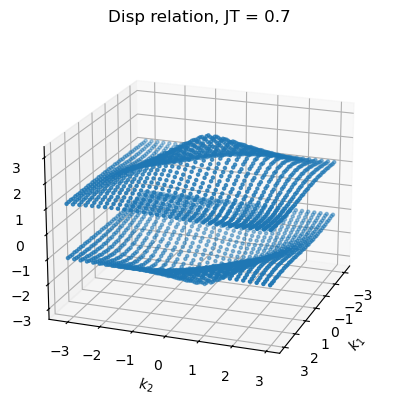

In [224]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

np.set_printoptions(threshold=np.inf)
ks1_ext = np.tile(np.repeat(ks1, len_block), len(ks2))
# print(ks1_ext)
ks2_ext = np.repeat(ks2, len_block * len(ks1))
# print(ks2_ext)

ax.scatter(ks1_ext, ks2_ext, np.reshape(eps.real, -1), s = 5)
ax.set_xlabel(r'$k_1$')
ax.set_ylabel(r'$k_2$')
ax.set_zlabel('quasi-energy')
ax.view_init(elev=20, azim=20)
ax.set_title(f'Disp relation, JT = {T}' )
plt.show()

/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


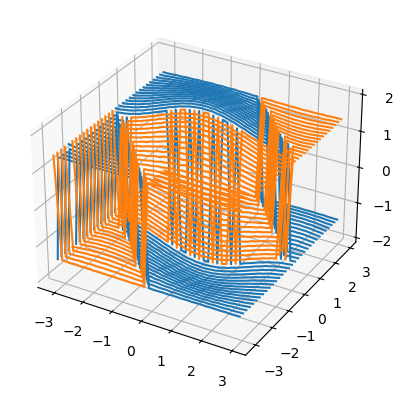

In [168]:
# Reshape eps to (len(ks2), len(ks1), len_block)
eps_arr = np.array(eps).reshape(len(ks2), len(ks1), len_block)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for band in range(len_block):
    for i, k2 in enumerate(ks2):
        ax.plot(ks1, [k2]*len(ks1), eps_arr[i,:,band], color=f"C{band}")

plt.show()